In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read files:
df = pd.read_csv("clean_1_train.csv")
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
df.shape

(8519, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
overall_sales_rate = df['Item_Outlet_Sales'].mean()
overall_sales_rate

2181.188779387252

In [6]:
df.groupby("Outlet_Identifier")["Item_Identifier"].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    527
OUT027    932
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Item_Identifier, dtype: int64

Feature Correlation 

In [7]:
corr_matrix=df.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


<AxesSubplot:>

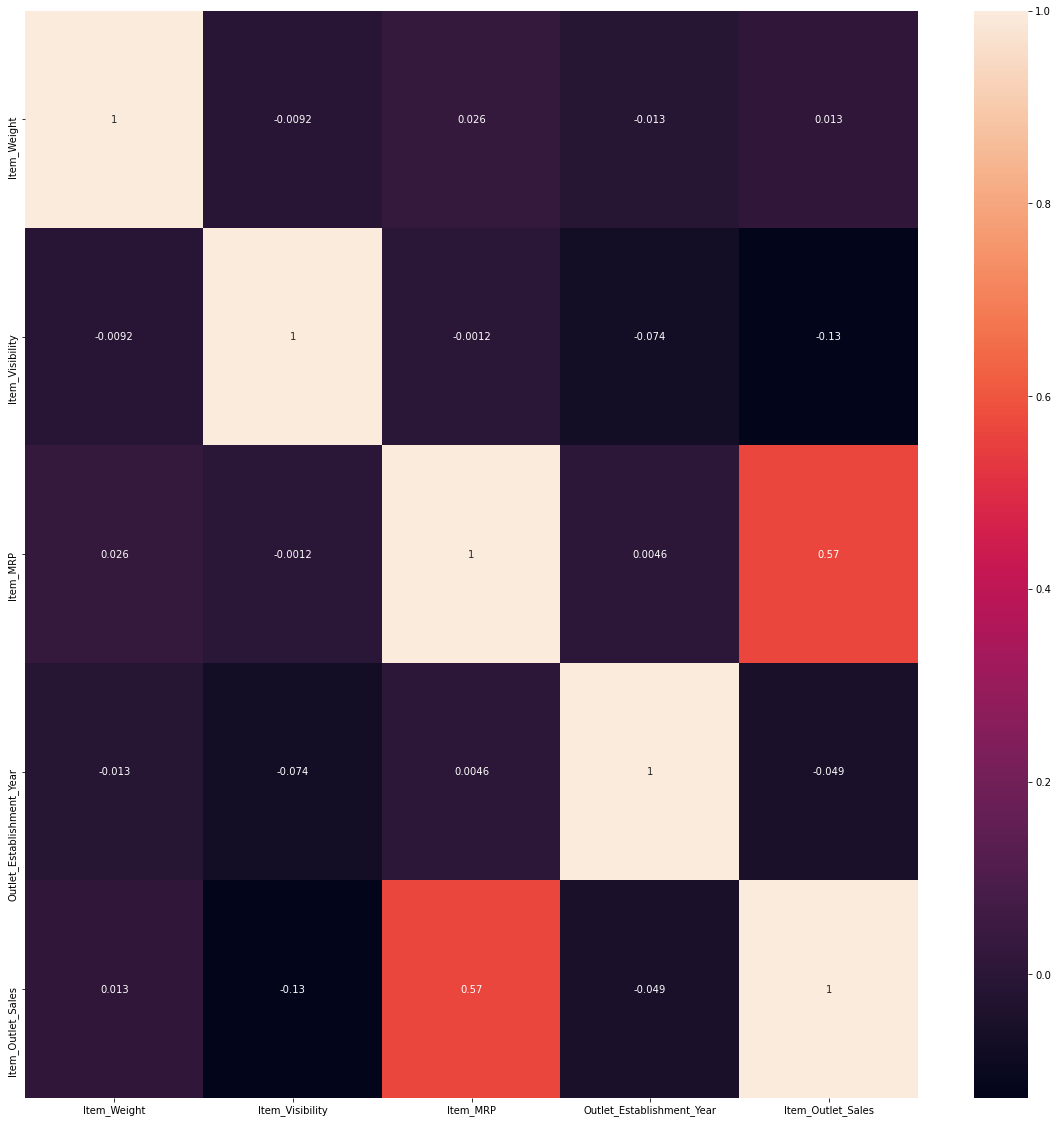

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

We see that the Item_MRP is highly correlated with Item_outlet_Sales.
Therefore,we want to compute the association of the target with each feature while adjusting for the effect of the remaining features.

This can be done using Univariante and Bivariante linear regression.

# Univariante Analysis 

In [9]:
X=df['Item_MRP'].values.reshape(-1,1)
y=df['Item_Outlet_Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6815, 1)
(1704, 1)
(6815,)
(1704,)


In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = lr_model.predict(X_train)
y_pred

array([1638.06631253, 1827.84394572, 2657.62078823, ..., 2740.73188653,
       3565.88699524, 3359.76999251])

In [14]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print("Score of Training:",100*score)

Score of Training: 32.031452064357325


In [15]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.08
RMSE : 1400
CV Score : Mean - 1398 | Std - 79.86 | Min - 1229 | Max - 1494


# Polynomial Regression
####  Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [16]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1),y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [17]:
poly_pred=pipe.predict(X.reshape(-1,1))

In [18]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

32.24684888585043


In [19]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.08
RMSE : 1400
CV Score : Mean - 1398 | Std - 79.86 | Min - 1229 | Max - 1494


__________________________________________________________________
# Bivariante Analysis 

In [20]:
response_features = ['Item_Visibility','Item_MRP']

In [21]:
X=df[response_features].values
y=df['Item_Outlet_Sales']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6815, 2)
(1704, 2)
(6815,)
(1704,)


In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr_model.predict(X_train)
y_pred

array([1708.35906422, 1819.13824543, 2819.8002026 , ..., 2674.40040624,
       3600.21174098, 3568.80878111])

In [26]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print(100*score)

33.468271103932814


In [27]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 31.97
RMSE : 1385
CV Score : Mean - 1383 | Std - 79.89 | Min - 1220 | Max - 1495


## Polynomial Regression
####  Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [28]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [29]:
poly_pred=pipe.predict(X)

In [30]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

34.95958877773293


In [31]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 31.97
RMSE : 1385
CV Score : Mean - 1383 | Std - 79.89 | Min - 1220 | Max - 1495
